<a href="https://colab.research.google.com/github/barta3235/working_model_vgg16/blob/main/CF_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import cv2
import matplotlib.pyplot as plt
!pip install lime
from lime.lime_image import LimeImageExplainer
import skimage.color as color
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model
import cv2
from lime.lime_image import LimeImageExplainer

from google.colab import drive
drive.mount('/content/drive')

<ipython-input-1-d7c914bb1f7f>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=fd596e0b0d1b134de36bbb651bad95e078c519b0ca057e678e319d2b31472b35
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
Mounted at /content/drive


LIME

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━

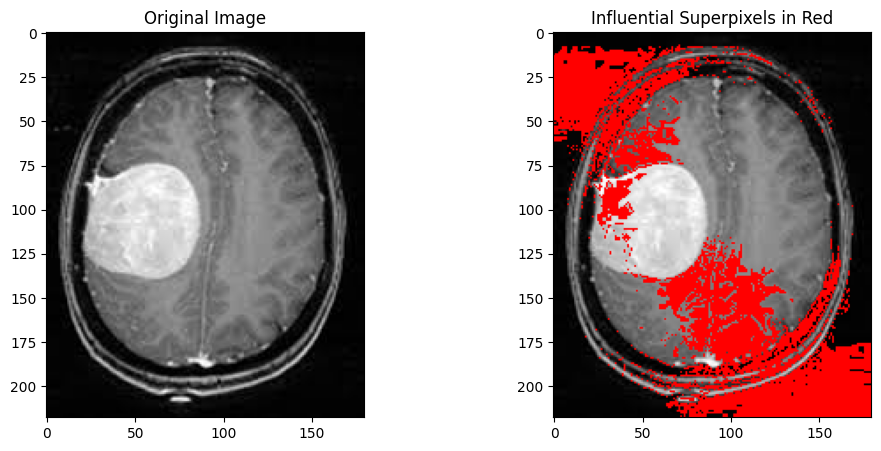

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y1 (1).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8

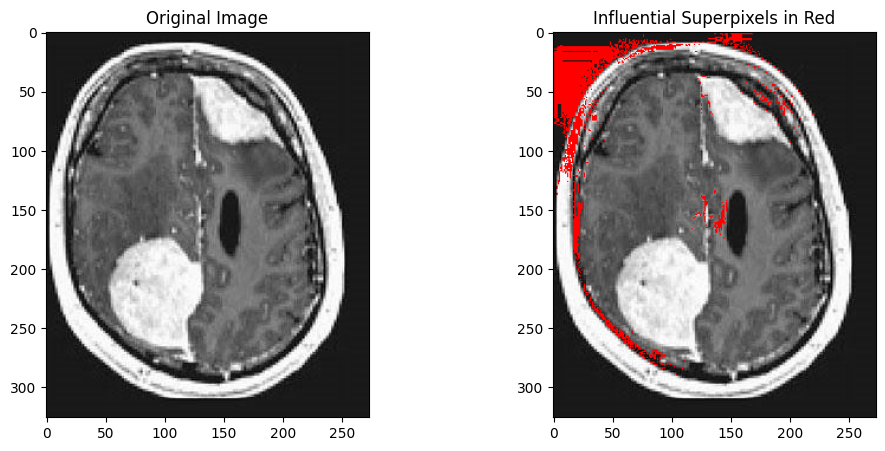

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y2N (21).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━

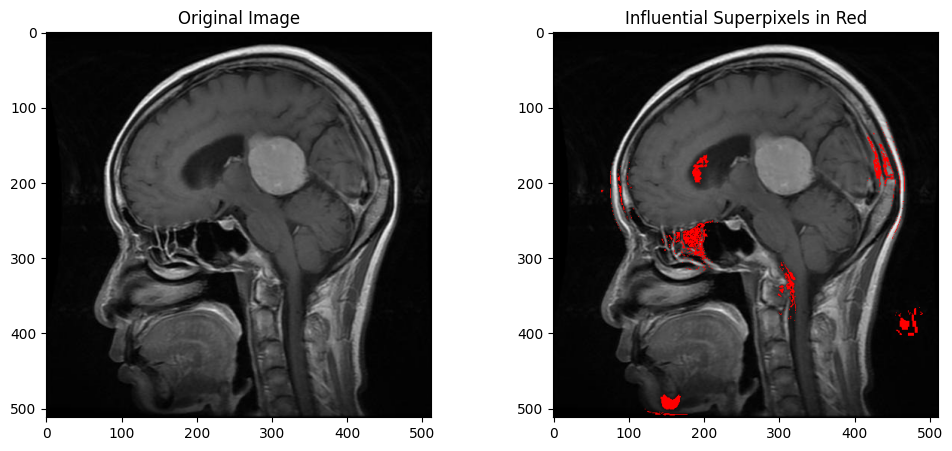

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y2N (284).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━

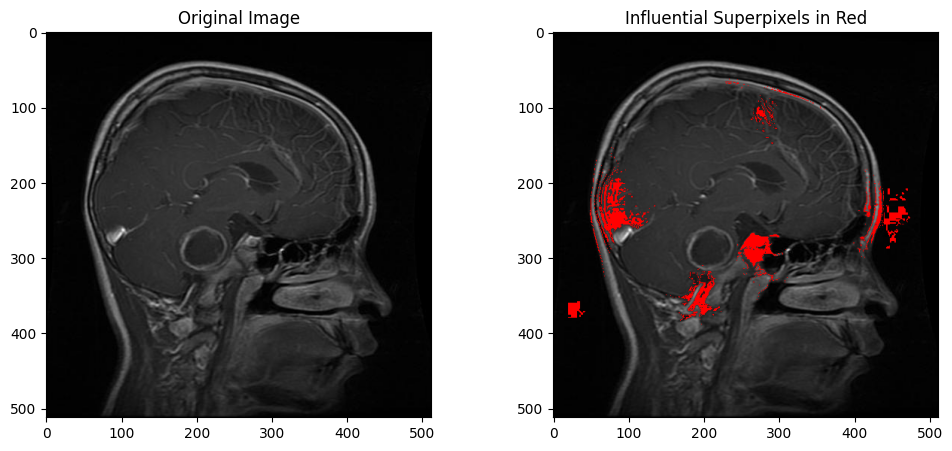

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-gl_1320 (190).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━

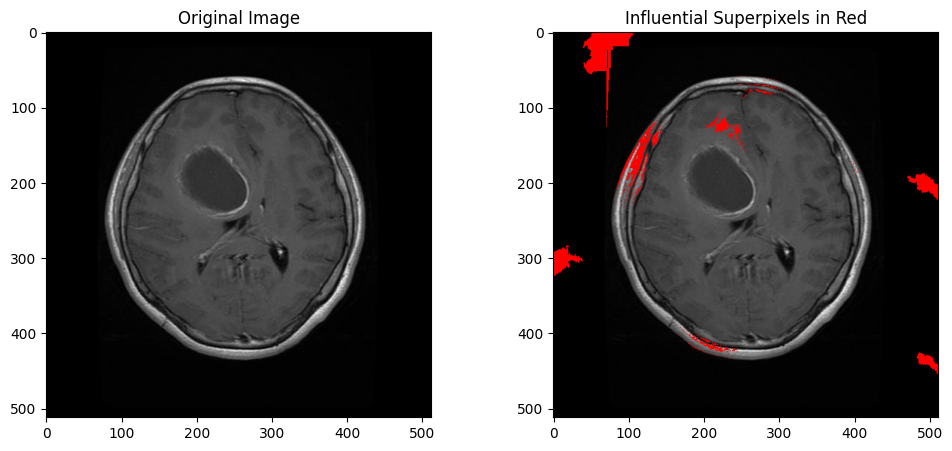

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-gl_1320 (7).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━

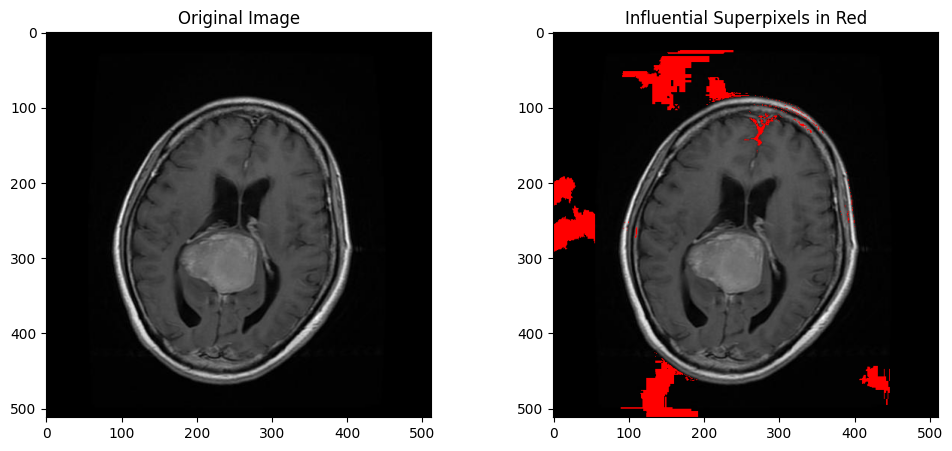

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (416).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (519).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (853).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (98).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/CE_PAPER_MRI/braint1 (1).jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


GRAD_CAM

GRAD CAM

GRAD CAM

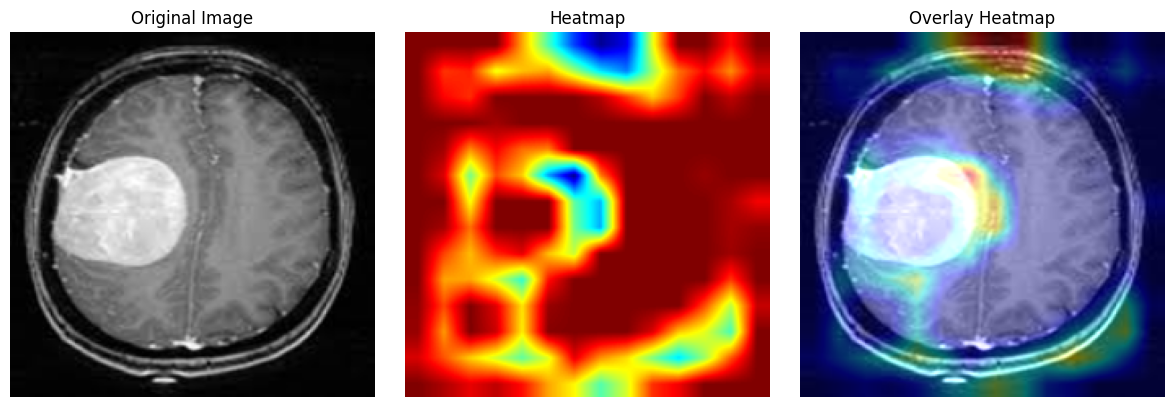

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y1 (1).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


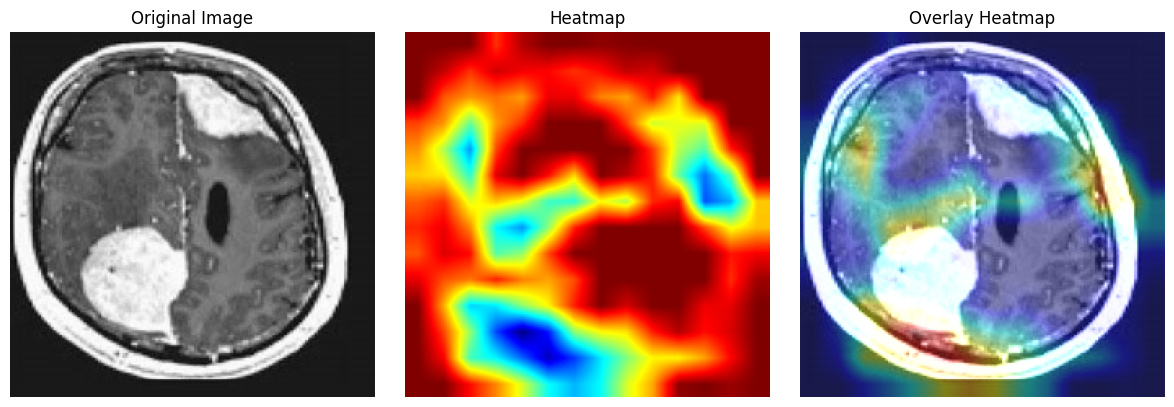

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y2N (21).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


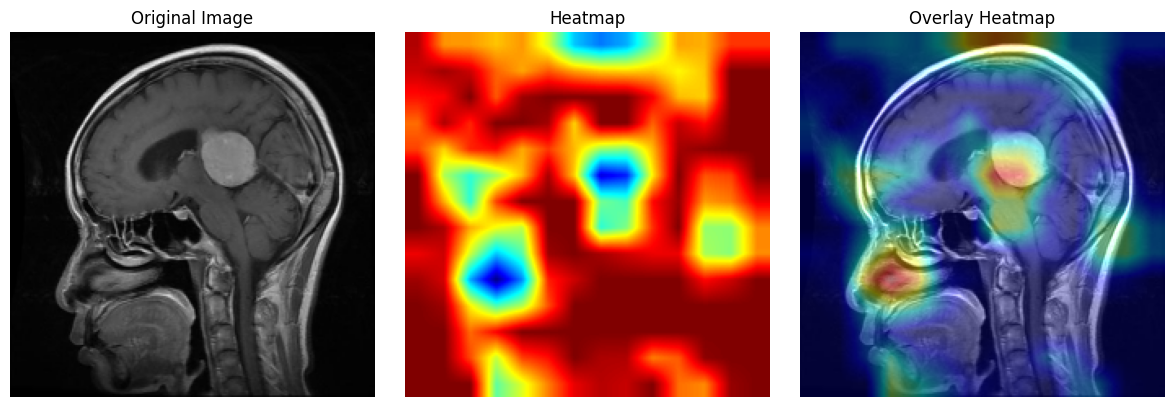

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y2N (284).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


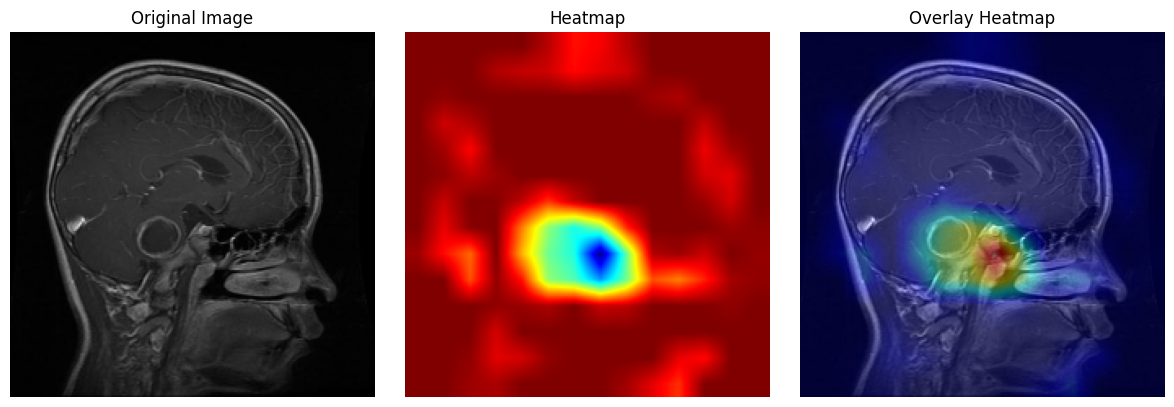

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-gl_1320 (190).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


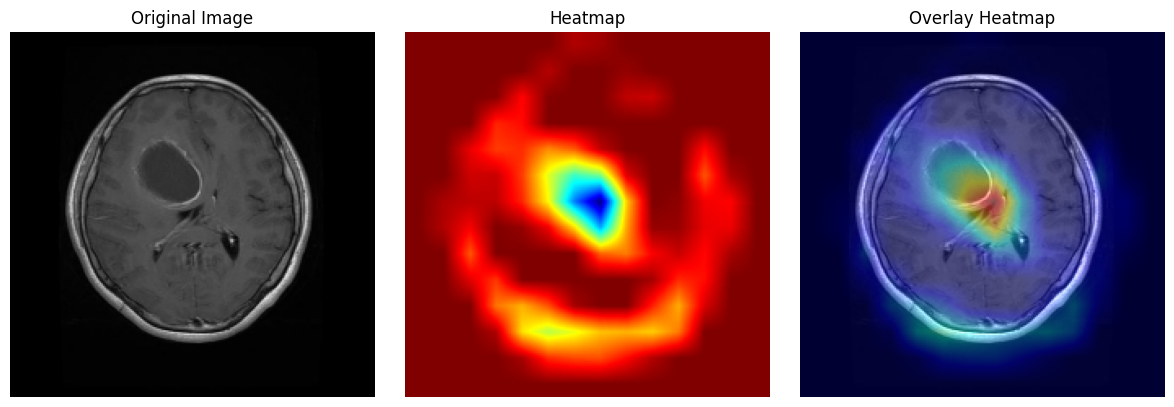

<Figure size 640x480 with 0 Axes>

In [6]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-gl_1320 (7).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


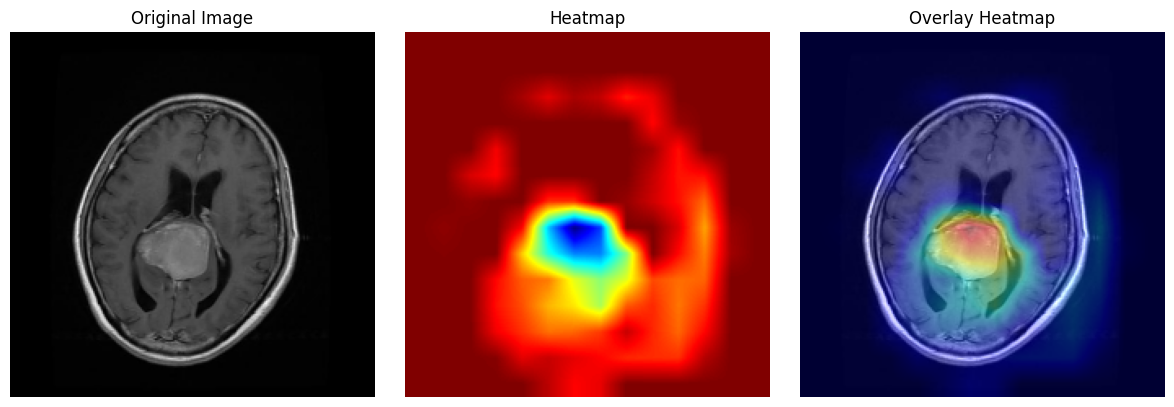

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (416).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


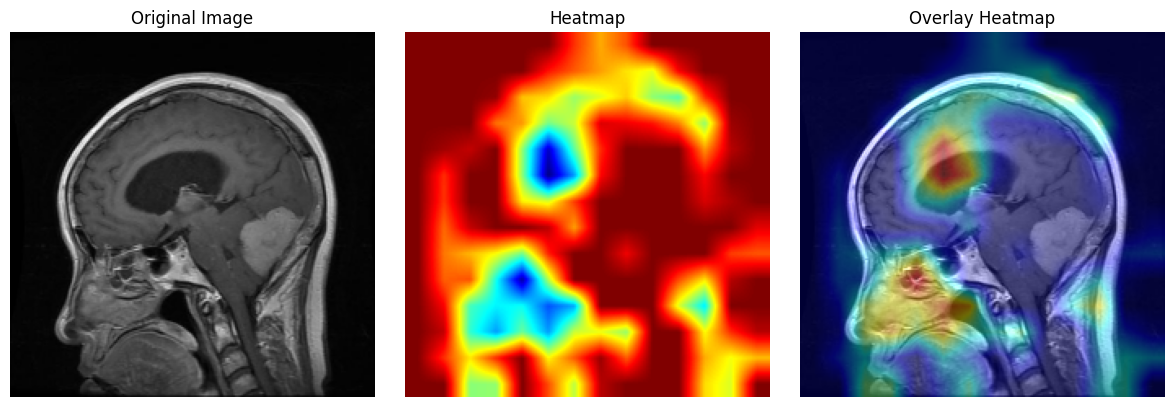

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (519).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


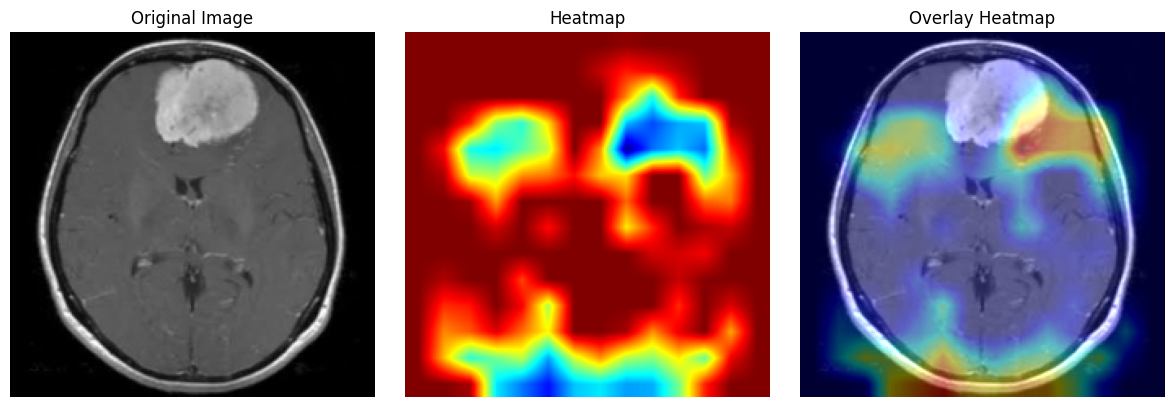

<Figure size 640x480 with 0 Axes>

In [9]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (853).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


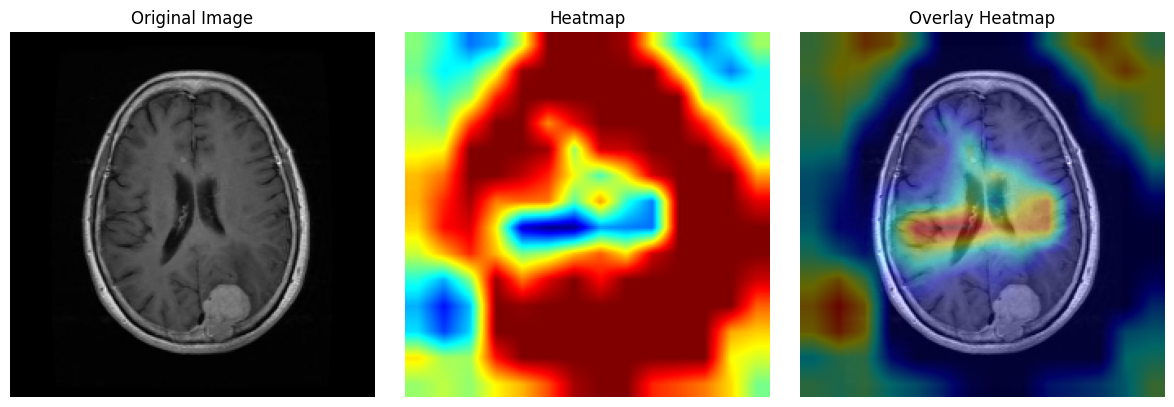

<Figure size 640x480 with 0 Axes>

In [10]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (98).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


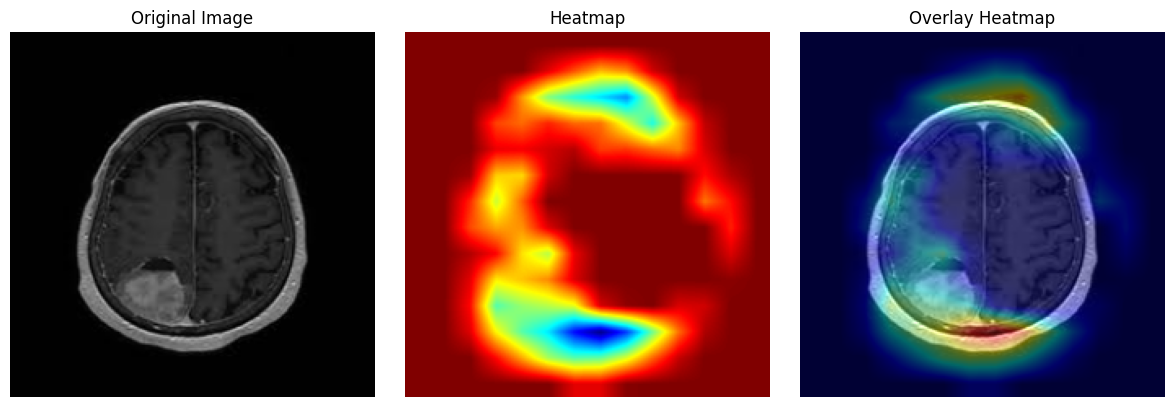

<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/braint1 (1).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


SHAP

SHAP

SHAP

SHAP

In [12]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


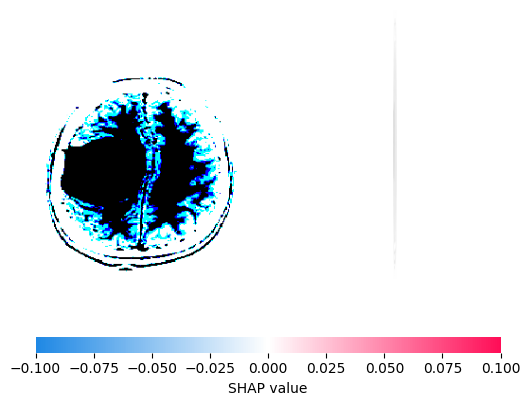

In [13]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y1 (1).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


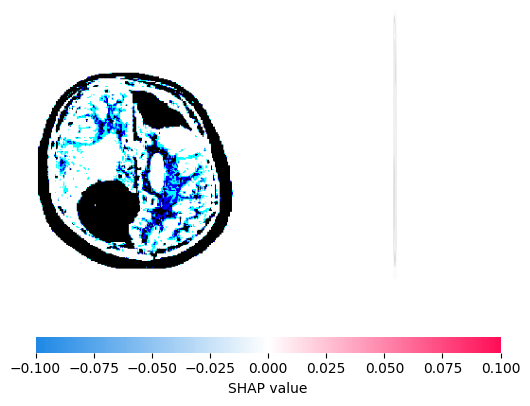

In [14]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y2N (21).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


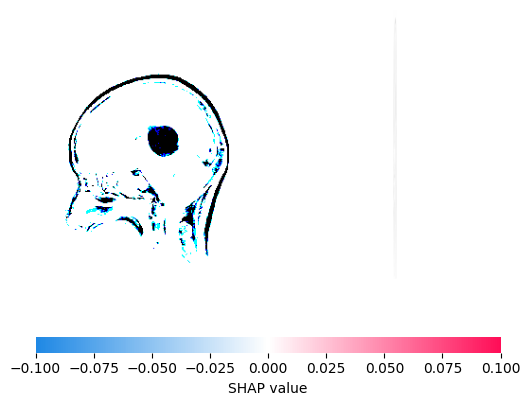

In [15]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y2N (284).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


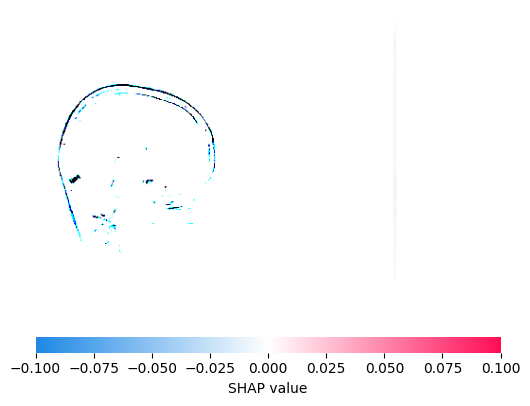

In [16]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-gl_1320 (190).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


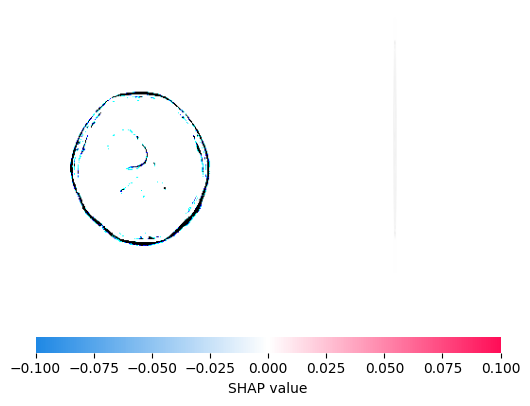

In [17]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-gl_1320 (7).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


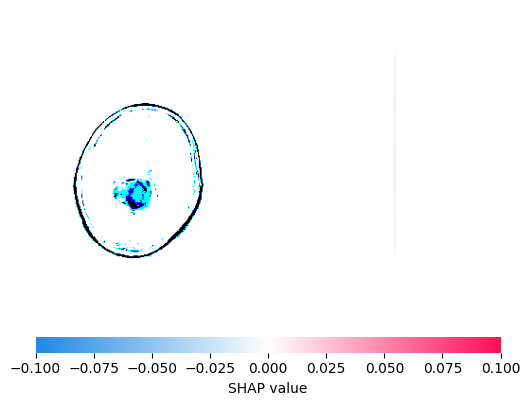

In [18]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (416).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


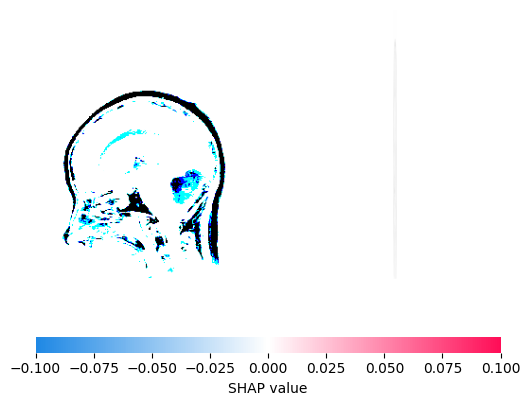

In [19]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (519).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


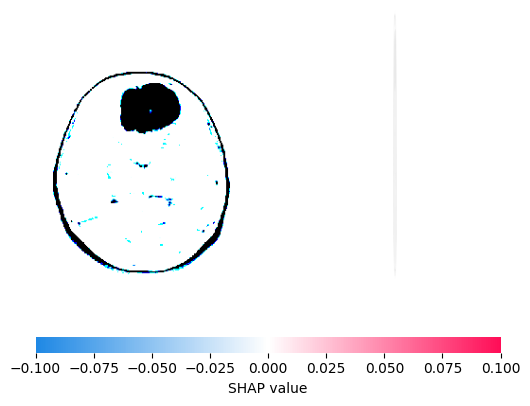

In [20]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (853).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


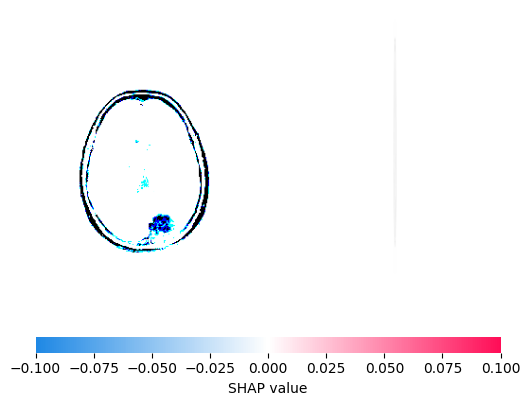

In [21]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/Y_Tr-me_1317 (98).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


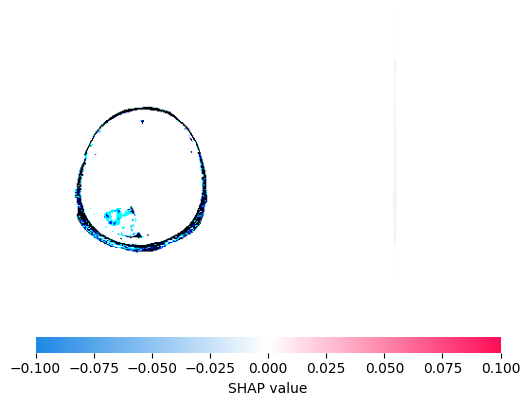

In [22]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/CE_PAPER_MRI/braint1 (1).jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)
